In [ ]:
pip install face_recognition opencv-python numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=432cc5700427d84b27bc6900719e1179e1832bc2a0ac045e4f1d32b4949d5f13
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


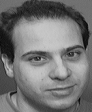

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread("/content/drive/MyDrive/Candidates2/s9/10.pgm",1)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch

print(torch.cuda.is_available())


True


In [ ]:
import face_recognition
import cv2
import os
import numpy as np

def load_images_from_folder(folder):
    images = []
    for root, dirs, files in os.walk(folder):
        for filename in files:
            if filename.lower().endswith('.pgm'):
                img_path = os.path.join(root, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                    relative_path = os.path.relpath(img_path, folder)
                    images.append((relative_path, img_rgb))
    return images

def encode_faces(images):
    encoded_faces = []
    for filename, image in images:
        encodings = face_recognition.face_encodings(image)
        if encodings:
            encoded_faces.append((filename, encodings[0]))
    return encoded_faces

def find_best_match(reference_image, candidate_images):
    reference_encoding = face_recognition.face_encodings(reference_image)[0]
    face_distances = face_recognition.face_distance(
        [encoding for _, encoding in candidate_images], reference_encoding)
    best_match_index = np.argmin(face_distances)
    return candidate_images[best_match_index][0], face_distances[best_match_index]

def main():
    reference_image_path = "/content/drive/MyDrive/1.pgm"
    candidates_folder_path = "/content/drive/MyDrive/Candidates2"

    reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)
    if reference_image is None:
        print("Failed to load the reference image.")
        return

    reference_image_rgb = cv2.cvtColor(reference_image, cv2.COLOR_GRAY2RGB)

    candidate_images = load_images_from_folder(candidates_folder_path)
    if not candidate_images:
        print("No candidate images found.")
        return

    encoded_faces = encode_faces(candidate_images)
    if not encoded_faces:
        print("No faces encoded from candidate images.")
        return

    best_match_filename, best_match_distance = find_best_match(reference_image_rgb, encoded_faces)

    print(f"Best match: {best_match_filename} with distance: {best_match_distance}")

if __name__ == "__main__":
    main()


Best match: s1/1.pgm with distance: 0.0
